# Amazon Product Listing EDA
------

## Import Libraries 

In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.pyplot import figure 
import matplotlib 

matplotlib.rcParams['figure.figsize'] = (12,8)

------
## Load Dataset In Pandas 

In [38]:
df = pd.read_csv('amazon-products.csv')

-------
## Take Alook At The Data

In [39]:
df.head()

,Uniq Id,Crawl Timestamp,Pageurl,Website,Title,Num Of Reviews,Average Rating,Number Of Ratings,Model Num,Sku,...,Stock,Carrier,Color Category,Internal Memory,Screen Size,Five Star,Four Star,Three Star,Two Star,One Star
0,850d37ddfe7b8c4e22658a8338c5b655,2020-10-13 10:19:24 +0000,https://www.amazon.com/dp/B06XDBD9T9/?th=1&psc=1,Amazon.com,Visit the Visbiome Store Visbiome® High Potenc...,0,4.5,970.0,NaN,B06XDBD9T9,...,False,NaN,NaN,NaN,NaN,767.0,88.0,59.0,20.0,49.0
1,f73411fe6b48443c32b62ca690ec2f59,2020-10-02 20:51:21 +0000,https://www.amazon.com/dp/B089YYTJ86?th=1&psc=1,Amazon.com,Occus Parts & Accessories UDI i20 i21 RC Quadc...,0,0.0,NaN,NaN,B089YYTJ86,...,True,NaN,Receiver bracket,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,140b75e4d7f9218f9ac62886a76c0e1f,2020-10-07 21:12:41 +0000,https://www.amazon.com/dp/B08H8JY4TF?th=1&psc=1,Amazon.com,TemUnique Leather Cover Compatible with Samsun...,0,0.0,NaN,yixin13772,B08H8JY4TF,...,False,NaN,Purple,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8e8321a62e5f130e422461a24addfd2f,2020-10-24 07:56:24 +0000,https://www.amazon.com/dp/B07P7553PY?th=1&psc=1,Amazon.com,DalaB kiss Heart Love Cute Bear Unicorn Acryli...,0,0.0,NaN,NaN,B07P7553PY,...,True,NaN,1060309001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,dfac38b56009dd6f2bd01bfa814ae932,2020-10-07 14:37:11 +0000,https://www.amazon.com/dp/B07PZV2ZK6?th=1&psc=1,Amazon.com,Visit the HAVASU NUTRITION Store Havasu Nutrit...,0,4.8,2743.0,NaN,B07PZV2ZK6,...,False,NaN,Kids,NaN,NaN,2332.0,247.0,83.0,28.0,55.0


In [40]:
df.sample(10)

,Uniq Id,Crawl Timestamp,Pageurl,Website,Title,Num Of Reviews,Average Rating,Number Of Ratings,Model Num,Sku,...,Stock,Carrier,Color Category,Internal Memory,Screen Size,Five Star,Four Star,Three Star,Two Star,One Star
16794,42a383f19d1b20e27232972b1049b8ba,2020-10-22 20:59:24 +0000,https://www.amazon.com/dp/B08DHSJPJG?th=1&psc=1,Amazon.com,HCFKJ Reusable Air Pollution Cotton Scarf Dust...,0,0.0,NaN,NaN,B08DHSJPJG,...,True,NaN,Gray,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28498,43019b739263a293f1bf2cbf577fe14e,2020-10-12 04:50:10 +0000,https://www.amazon.com/dp/B0845L5Y8B/?th=1&psc=1,Amazon.com,Case Safety City Case Safety 12 x XL Ink Cartr...,0,0.0,NaN,Case-Safety-202883617198-A2,B0845L5Y8B,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4261,7c12b8d07799552b4a56a4ce7d599ab4,2020-10-17 16:28:56 +0000,https://www.amazon.com/dp/B079GMZHT7/?th=1&psc=1,Amazon.com,Visit the Avantree Store Avantree ANC032 Activ...,0,4.1,1307.0,BTHS-ANC032-BLK,B079GMZHT7,...,True,NaN,Black,NaN,NaN,772.0,210.0,131.0,79.0,118.0
20902,3e109603823e8a75dd211246c0d60b01,2020-10-06 06:50:05 +0000,https://www.amazon.com/dp/B08HHCCQL8/?th=1&psc=1,Amazon.com,Essenc 4GB Android 4.4 Wi-Fi Tablet PC Beautif...,0,0.0,NaN,12578A3,B08HHCCQL8,...,False,NaN,Pink,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5233,79118657876ba8ccdb7c9659395006b9,2020-10-19 18:10:07 +0000,https://www.amazon.com/dp/B00DPLZG3W/?th=1&psc=1,Amazon.com,Equate Mature Adult 50+ One Daily Complete Mul...,0,4.8,106.0,NaN,B00DPLZG3W,...,True,NaN,NaN,NaN,NaN,92.0,10.0,3.0,3.0,3.0
14307,0da9c7a9fa0a0b83a4d497b0533d4937,2020-10-04 08:48:21 +0000,https://www.amazon.com/dp/B08JZ34BNR/?th=1&psc=1,Amazon.com,Karymi 【USA In Stock 】6PCS Adults Teachers Coo...,0,0.0,NaN,NaN,B08JZ34BNR,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15046,6bc7d1c90da79fb8e40d7c99f21a9eb3,2020-10-17 17:55:02 +0000,https://www.amazon.com/dp/B08KY1JWHS/?th=1&psc=1,Amazon.com,1080P WiFi Camera Smart Auto Tracking Security...,0,0.0,NaN,NaN,B08KY1JWHS,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9098,4084c1f58b8cb0cf1de1df8e6da5789b,2020-10-03 21:41:27 +0000,https://www.amazon.com/dp/B089ZLKRGF?th=1&psc=1,Amazon.com,Occus Parts & Accessories 1Pair FUTABA Remote ...,0,0.0,NaN,NaN,B089ZLKRGF,...,True,NaN,Red,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5887,4bf603d47ed83e0bf243e2fef1402d68,2020-10-17 14:27:20 +0000,https://www.amazon.com/dp/B08D7C9MS7/?th=1&psc=1,Amazon.com,PKPOWER PK Power 3.3ft White Micro USB PC Char...,0,0.0,NaN,NaN,B08D7C9MS7,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,8b6fdeace03a0db0360119c4e662f4ce,2020-10-02 21:42:50 +0000,https://www.amazon.com/dp/B084R6K1GW/?th=1&psc=1,Amazon.com,Visit the Pure Organic Ingredients Store Black...,0,4.9,14.0,NaN,B084R6K1GW,...,False,NaN,NaN,NaN,NaN,13.0,2.0,NaN,NaN,NaN


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Uniq Id            30000 non-null  object 
 1   Crawl Timestamp    30000 non-null  object 
 2   Pageurl            30000 non-null  object 
 3   Website            30000 non-null  object 
 4   Title              30000 non-null  object 
 5   Num Of Reviews     30000 non-null  int64  
 6   Average Rating     30000 non-null  float64
 7   Number Of Ratings  12843 non-null  float64
 8   Model Num          4213 non-null   object 
 9   Sku                29794 non-null  object 
 10  Upc                0 non-null      float64
 11  Manufacturer       30000 non-null  object 
 12  Model Name         30000 non-null  object 
 13  Price              18668 non-null  object 
 14  Monthly Price      0 non-null      float64
 15  Stock              30000 non-null  bool   
 16  Carrier            1 n

In [42]:
# Delete Unneccassery Columns 
# Crawl Timestamp , Pageurl , Website , Upc , Monthly Price , Carrier , Internal Memory , Screen Size
df.drop('Crawl Timestamp', axis=1, inplace=True)
df.drop('Pageurl', axis=1, inplace=True)
df.drop('Website', axis=1, inplace=True)
df.drop('Monthly Price', axis=1, inplace=True)
df.drop('Carrier', axis=1, inplace=True)
df.drop('Internal Memory', axis=1, inplace=True)
df.drop('Screen Size', axis=1, inplace=True)
df.drop('Upc', axis=1, inplace=True)

----
## Take Another Look 

In [43]:
df.dtypes

Uniq Id               object
Title                 object
Num Of Reviews         int64
Average Rating       float64
Number Of Ratings    float64
Model Num             object
Sku                   object
Manufacturer          object
Model Name            object
Price                 object
Stock                   bool
Color Category        object
Five Star            float64
Four Star            float64
Three Star           float64
Two Star             float64
One Star             float64
dtype: object

In [44]:
## remove , and . from price string 
df['Price'] = df.Price.str.replace(',','')
df['Price'] = df.Price.str.replace('.','')
df['Price'] = df['Price'].str.lstrip('0')

<ipython-input-44-76f5cc186afd>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Price'] = df.Price.str.replace('.','')


In [59]:
# Convert Price Column To Float 
df['Price'] = df['Price'].astype(float)

# convert number of reviews to int
#df["Number Of Ratings"]=df["Number Of Ratings"].astype(int)

In [46]:
df.dtypes

Uniq Id               object
Title                 object
Num Of Reviews         int64
Average Rating       float64
Number Of Ratings    float64
Model Num             object
Sku                   object
Manufacturer          object
Model Name            object
Price                float64
Stock                   bool
Color Category        object
Five Star            float64
Four Star            float64
Three Star           float64
Two Star             float64
One Star             float64
dtype: object

In [47]:
df.sample(5)

,Uniq Id,Title,Num Of Reviews,Average Rating,Number Of Ratings,Model Num,Sku,Manufacturer,Model Name,Price,Stock,Color Category,Five Star,Four Star,Three Star,Two Star,One Star
15601,8dc09e45351fc2ff72a2afef20814407,"DIYAGO 1pc Silk Scarf Mouth Cover for Women,Fa...",0,0.0,NaN,NaN,B08GMBQHH5,"DIYAGO 1pc Silk Scarf Mouth Cover for Women,Fa...","DIYAGO 1pc Silk Scarf Mouth Cover for Women,Fa...",NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
1491,90ea585b288d24c4be639762c28d47c7,Visit the EFOSE Store PFB302S CCTV Camera Wall...,0,4.7,17.0,NaN,B081W2Y2G6,Visit the EFOSE Store PFB302S CCTV Camera Wall...,Visit the EFOSE Store PFB302S CCTV Camera Wall...,2499.0,True,NaN,16.0,NaN,NaN,NaN,2.0
15751,2a9c0b10fbfdbcb330700025c55b57c9,Visit the BulkSupplements Store BulkSupplement...,0,4.5,625.0,NaN,B00F7UIYWO,Visit the BulkSupplements Store BulkSupplement...,Visit the BulkSupplements Store BulkSupplement...,NaN,False,NaN,482.0,63.0,44.0,13.0,25.0
727,b6e78dd16b06afe304b3e8b5c7627401,Visit the Sony Store Sony Xperia X F5121 32GB ...,0,4.1,252.0,1302-5762,B01FJT7N4W,Visit the Sony Store Sony Xperia X F5121 32GB ...,Visit the Sony Store Sony Xperia X F5121 32GB ...,19999.0,True,Black,149.0,41.0,28.0,13.0,26.0
12376,72850ce4e82db462318c1965bec35961,Healing Solutions Celery Seed Essential Oil - ...,0,4.1,47.0,NaN,B00PXADTQO,Healing Solutions Celery Seed Essential Oil - ...,Healing Solutions Celery Seed Essential Oil - ...,NaN,False,NaN,25.0,10.0,8.0,3.0,3.0


-----------
## Deal With Duplicates

In [48]:
df[df.duplicated()]

,Uniq Id,Title,Num Of Reviews,Average Rating,Number Of Ratings,Model Num,Sku,Manufacturer,Model Name,Price,Stock,Color Category,Five Star,Four Star,Three Star,Two Star,One Star


--------
## See Null Values 

In [49]:
df[df.isnull()]

,Uniq Id,Title,Num Of Reviews,Average Rating,Number Of Ratings,Model Num,Sku,Manufacturer,Model Name,Price,Stock,Color Category,Five Star,Four Star,Three Star,Two Star,One Star
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
## Get Null Percentage
for col in df.columns:
    missing = np.mean(df[col].isnull()) * 100
    print(f'{col} - {round(missing,2)}%')

Uniq Id - 0.0%
Title - 0.0%
Num Of Reviews - 0.0%
Average Rating - 0.0%
Number Of Ratings - 57.19%
Model Num - 85.96%
Sku - 0.69%
Manufacturer - 0.0%
Model Name - 0.0%
Price - 37.77%
Stock - 0.0%
Color Category - 38.22%
Five Star - 59.73%
Four Star - 70.13%
Three Star - 74.1%
Two Star - 78.46%
One Star - 73.4%


In [51]:
## Fill Price Nan With Price Mean
price_mean = df.Price.mean()
df.Price.fillna(price_mean,inplace=True)

In [52]:
## Get Null Percentage
for col in df.columns:
    missing = np.mean(df[col].isnull()) * 100
    print(f'{col} - {round(missing,2)}%')

Uniq Id - 0.0%
Title - 0.0%
Num Of Reviews - 0.0%
Average Rating - 0.0%
Number Of Ratings - 57.19%
Model Num - 85.96%
Sku - 0.69%
Manufacturer - 0.0%
Model Name - 0.0%
Price - 0.0%
Stock - 0.0%
Color Category - 38.22%
Five Star - 59.73%
Four Star - 70.13%
Three Star - 74.1%
Two Star - 78.46%
One Star - 73.4%


-----
## Find Correlation 

In [53]:
## remove num of reviews column 
df.drop('Num Of Reviews', axis=1, inplace=True)

In [54]:
df.corr()

,Average Rating,Number Of Ratings,Price,Stock,Five Star,Four Star,Three Star,Two Star,One Star
Average Rating,1.000000,0.034414,-0.063752,0.057763,0.030397,0.051453,0.051794,0.049430,0.054021
Number Of Ratings,0.034414,1.000000,0.003134,0.009333,0.991714,0.973919,0.931979,0.909638,0.905181
Price,-0.063752,0.003134,1.000000,0.000041,0.006253,0.003130,0.000802,0.005886,0.005890
Stock,0.057763,0.009333,0.000041,1.000000,0.010318,0.013090,0.008634,0.008805,-0.001215
Five Star,0.030397,0.991714,0.006253,0.010318,1.000000,0.940429,0.879944,0.850385,0.850629
Four Star,0.051453,0.973919,0.003130,0.013090,0.940429,1.000000,0.974969,0.958401,0.932662
Three Star,0.051794,0.931979,0.000802,0.008634,0.879944,0.974969,1.000000,0.983560,0.953587
Two Star,0.049430,0.909638,0.005886,0.008805,0.850385,0.958401,0.983560,1.000000,0.972836
One Star,0.054021,0.905181,0.005890,-0.001215,0.850629,0.932662,0.953587,0.972836,1.000000


In [55]:
## assign unique random number for categorical values 
df.apply(lambda x:x.factorize()[0]).corr()

,Uniq Id,Title,Average Rating,Number Of Ratings,Model Num,Sku,Manufacturer,Model Name,Price,Stock,Color Category,Five Star,Four Star,Three Star,Two Star,One Star
Uniq Id,1.000000,0.934197,-0.091074,-0.050323,0.135082,0.979331,0.934197,0.934197,0.137440,-0.081254,0.306312,-0.049122,-0.055157,-0.063800,-0.066130,-0.067392
Title,0.934197,1.000000,-0.074408,-0.036995,0.155653,0.924975,1.000000,1.000000,0.150629,-0.070499,0.221987,-0.035620,-0.044539,-0.053281,-0.056521,-0.055326
Average Rating,-0.091074,-0.074408,1.000000,0.238003,0.115359,-0.089393,-0.074408,-0.074408,-0.037658,0.052357,-0.036380,0.204598,0.178728,0.186989,0.181190,0.221039
Number Of Ratings,-0.050323,-0.036995,0.238003,1.000000,0.115704,-0.048308,-0.036995,-0.036995,-0.034587,0.036856,-0.011203,0.847910,0.784722,0.731099,0.659502,0.699580
Model Num,0.135082,0.155653,0.115359,0.115704,1.000000,0.135680,0.155653,0.155653,0.077247,0.020694,-0.029312,0.103779,0.092904,0.084037,0.098955,0.122322
Sku,0.979331,0.924975,-0.089393,-0.048308,0.135680,1.000000,0.924975,0.924975,0.132417,-0.088239,0.299308,-0.046462,-0.052264,-0.061884,-0.062770,-0.065050
Manufacturer,0.934197,1.000000,-0.074408,-0.036995,0.155653,0.924975,1.000000,1.000000,0.150629,-0.070499,0.221987,-0.035620,-0.044539,-0.053281,-0.056521,-0.055326
Model Name,0.934197,1.000000,-0.074408,-0.036995,0.155653,0.924975,1.000000,1.000000,0.150629,-0.070499,0.221987,-0.035620,-0.044539,-0.053281,-0.056521,-0.055326
Price,0.137440,0.150629,-0.037658,-0.034587,0.077247,0.132417,0.150629,0.150629,1.000000,0.340394,-0.018754,-0.029083,-0.030050,-0.034087,-0.029662,-0.030243
Stock,-0.081254,-0.070499,0.052357,0.036856,0.020694,-0.088239,-0.070499,-0.070499,0.340394,1.000000,0.006446,0.033802,0.040186,0.038985,0.042682,0.038006


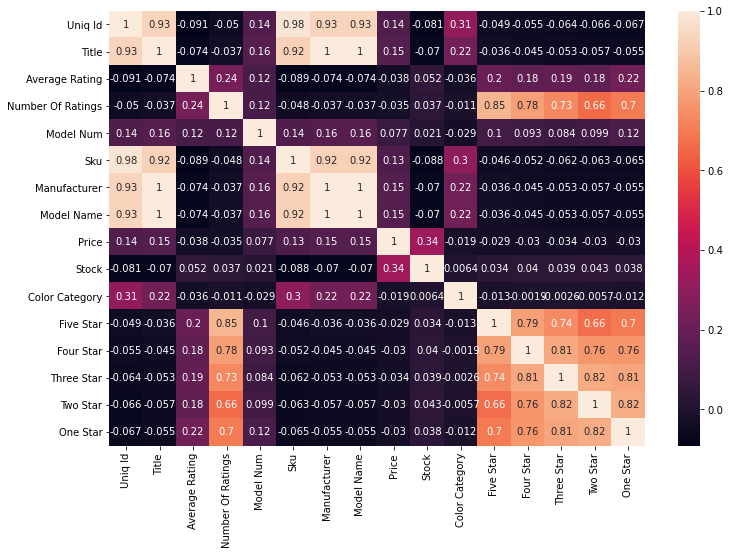

In [56]:
## see Corelation with seaborn heatmap
correlation_matrix = df.apply(lambda x:x.factorize()[0]).corr()
sns.heatmap(correlation_matrix,annot=True)
plt.show()

<AxesSubplot:xlabel='Number Of Ratings', ylabel='Five Star'>

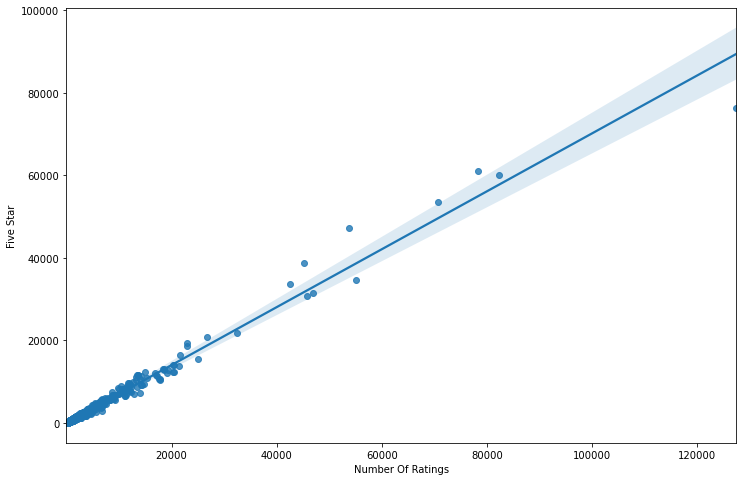

In [57]:
sns.regplot(x="Number Of Ratings" , y="Five Star" , data=df)

In [35]:
#sns.regplot(x="Manufacturer" , y="Number Of Ratings" , data=df)

In [ ]:
# Good rating not related to color 
# good rating not related to manfacture 
# most of ratings is positive 

<AxesSubplot:xlabel='Number Of Ratings', ylabel='Price'>

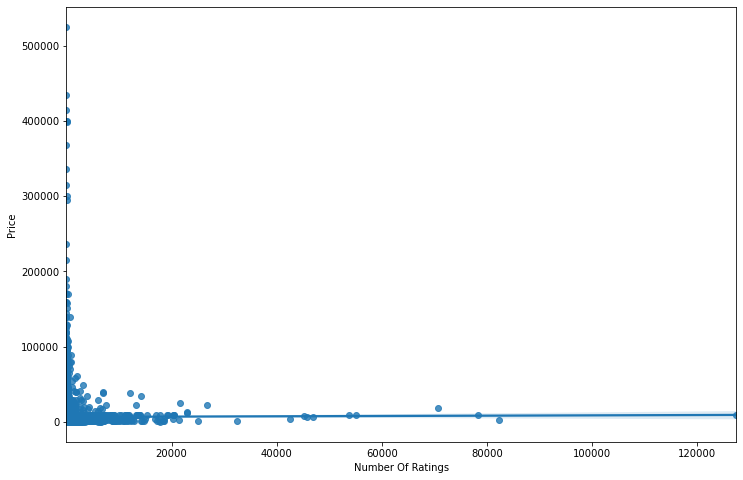

In [36]:
# no relation between price and the number of ratings 
sns.regplot(x="Number Of Ratings" , y="Price" , data=df)